In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-dataset-for-churn-analysis/spotify_churn_dataset.csv


In [2]:
# LETS LOAD DATASET
df = pd.read_csv("/kaggle/input/spotify-dataset-for-churn-analysis/spotify_churn_dataset.csv")
df

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,7996,Other,44,DE,Student,237,36,0.30,Mobile,0,1,1
7996,7997,Male,34,AU,Premium,61,64,0.59,Mobile,0,1,0
7997,7998,Female,17,US,Free,81,62,0.33,Desktop,5,0,0
7998,7999,Female,34,IN,Student,245,94,0.27,Desktop,0,1,0


## 📂 About the Dataset

### 🎯 Purpose  
To **predict whether a Spotify user will churn** (cancel subscription) or remain active.  
This helps in understanding **user engagement patterns** and building strategies to reduce churn.  

---

### 📊 Dataset Overview
- **Rows**: Each row represents a **unique Spotify user**  
- **Columns (Features)**: Mix of **numerical** and **categorical** data  

---

### 🔑 Features Description
- **user_id** → Unique identifier for each user  
- **gender** → User gender *(Male / Female / Other)*  
- **age** → User’s age  
- **country** → User’s location  
- **subscription_type** → Type of Spotify subscription *(Free / Premium / Family / Student)*  
- **listening_time** → Minutes spent listening per day  
- **songs_played_per_day** → Number of songs played daily  
- **skip_rate** → Percentage of songs skipped  
- **device_type** → Device used *(Mobile / Desktop / Web)*  
- **ads_listened_per_week** → Number of ads heard per week  
- **offline_listening** → Offline listening minutes  
- **is_churned** *(Target Variable)* →  
  - **0** → Active user  
  - **1** → Churned (cancelled subscription)  

---

### 📌 Dataset Type
- **Mixed** → Numerical + Categorical features  

---

### 🚀 Use Case
- Build **machine learning models** to predict churn  
- Analyze **user engagement behaviors**  
- Support Spotify in **reducing cancellations** and **improving retention strategies**  


In [3]:
# LETS UNDERSTAND ABOUT DATASET
print(f"shape of dataset is {df.shape}")
print("\n ======================================================================\n")
print(f"columns present in the dataset are {df.columns}")
print("\n ======================================================================\n")
print(f"information about dataset \n {df.info()}")
print("\n ======================================================================\n")
print(f"data discritbtion of every numerical feature \n{df.describe()}")
print("\n ======================================================================\n")
print(f"data describtion of non numerical datatype \n {df.describe(include=['float64','int64'])}")
print("\n ======================================================================\n")
print(f"numercial columns in dataset are {df.select_dtypes(include = ['float','int']).columns.to_list()}")
print("\n ======================================================================\n")
print(f"non numerical columns in dataset are {df.select_dtypes(include = 'O').columns.to_list()}")

shape of dataset is (8000, 12)


columns present in the dataset are Index(['user_id', 'gender', 'age', 'country', 'subscription_type',
       'listening_time', 'songs_played_per_day', 'skip_rate', 'device_type',
       'ads_listened_per_week', 'offline_listening', 'is_churned'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened

## VISULIZATION

In [4]:
# LETS IMPORT LIBRARY
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
# lets understand about the feature distribution 
for i in df.columns:
    print(f"unique categories in {i}")
    print(df[i].value_counts())
    print("\n"+"###"*20+"\n")
    

unique categories in user_id
user_id
7961    1
7962    1
7963    1
7964    1
7965    1
       ..
4       1
5       1
6       1
7       1
8       1
Name: count, Length: 8000, dtype: int64

############################################################

unique categories in gender
gender
Male      2691
Female    2659
Other     2650
Name: count, dtype: int64

############################################################

unique categories in age
age
51    207
37    202
57    202
20    202
49    200
22    200
21    199
42    199
41    196
30    192
46    192
47    190
52    190
48    188
33    186
18    185
53    185
59    184
32    184
50    184
58    183
34    182
19    181
35    179
36    177
17    177
44    176
24    176
23    175
55    174
54    173
39    173
43    173
31    173
28    173
26    173
16    172
38    170
40    170
56    170
25    168
45    168
29    151
27    146
Name: count, dtype: int64

############################################################

unique categories in co

In [6]:
# is_churned
# 0    5929
# 1    2071
# HERE WE CAN CLEARLY OBSERV THE DATA UNBALANCED

# BUT LETS DO CLASSFICATION


In [7]:
# LETS DISTRIBUTE THE FEATURE on basis of data distribution  FOR EASY VISULIZATION
cat_col = ["is_churned","offline_listening","device_type","subscription_type","country","gender"]
cat_num = ["ads_listened_per_week","age"]
num = df.drop(columns = cat_col+cat_num)

churn data distribution for  is_churned 
is_churned
0    5929
1    2071
Name: count, dtype: int64


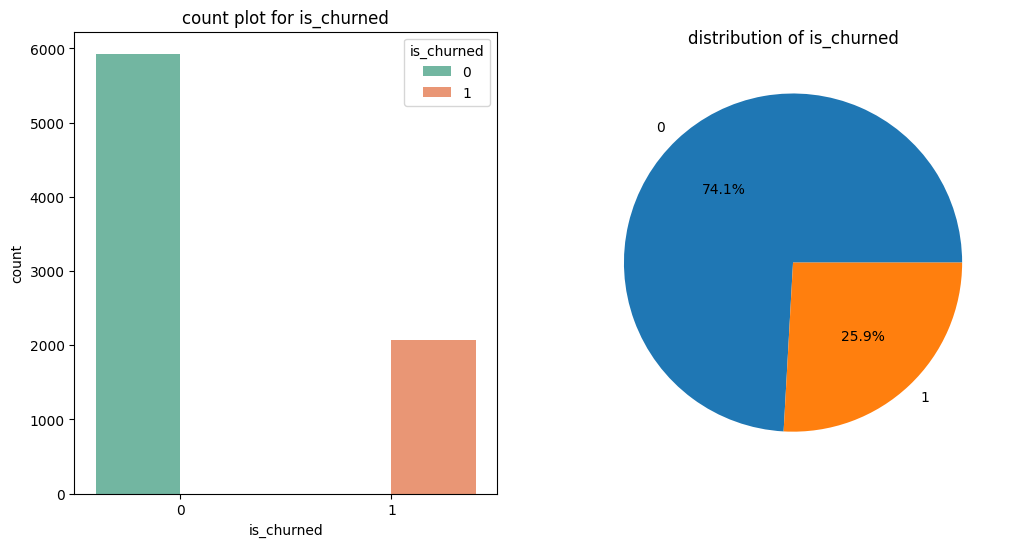

churn data distribution for  offline_listening 
offline_listening  is_churned
0                  0             1515
                   1              503
1                  0             4414
                   1             1568
Name: count, dtype: int64


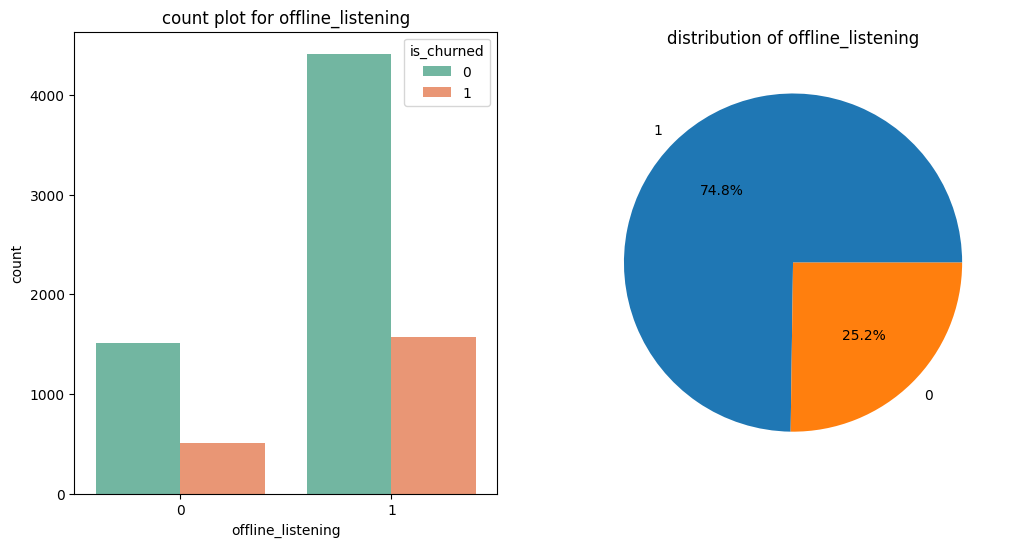

churn data distribution for  device_type 
device_type  is_churned
Desktop      0             2063
             1              715
Mobile       0             1900
             1              699
Web          0             1966
             1              657
Name: count, dtype: int64


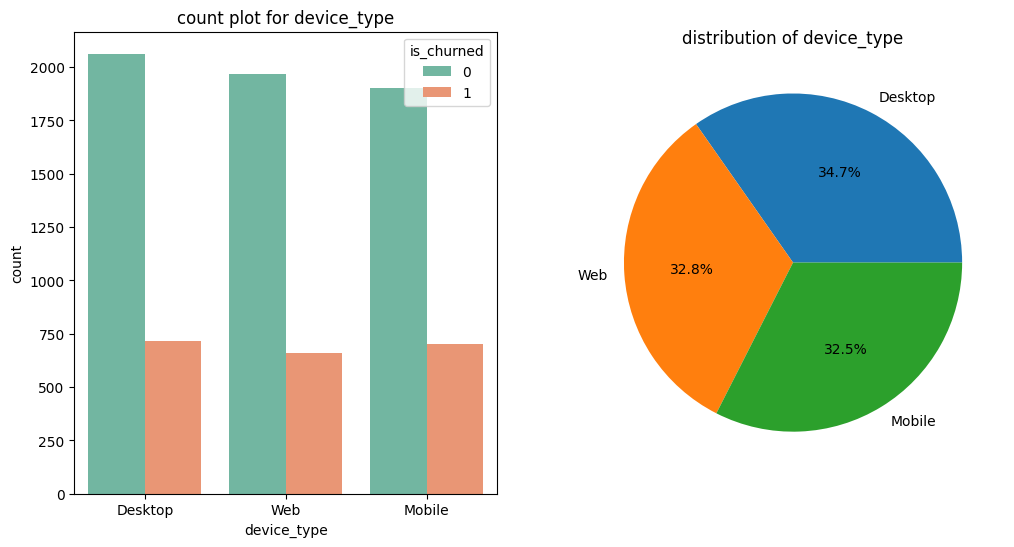

churn data distribution for  subscription_type 
subscription_type  is_churned
Family             0             1383
                   1              525
Free               0             1515
                   1              503
Premium            0             1585
                   1              530
Student            0             1446
                   1              513
Name: count, dtype: int64


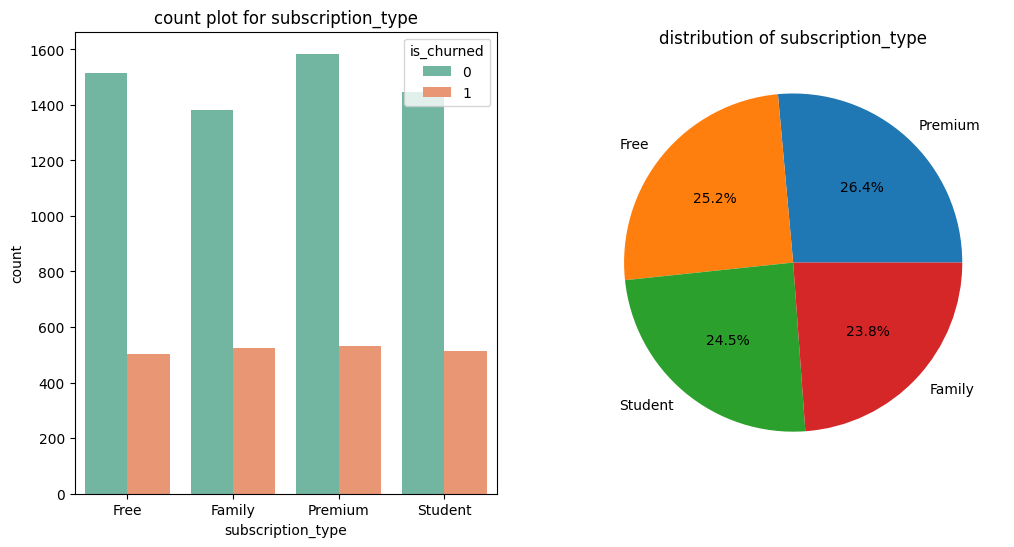

churn data distribution for  country 
country  is_churned
AU       0             768
         1             266
CA       0             717
         1             237
DE       0             738
         1             277
FR       0             720
         1             269
IN       0             765
         1             246
PK       0             724
         1             275
UK       0             727
         1             239
US       0             770
         1             262
Name: count, dtype: int64


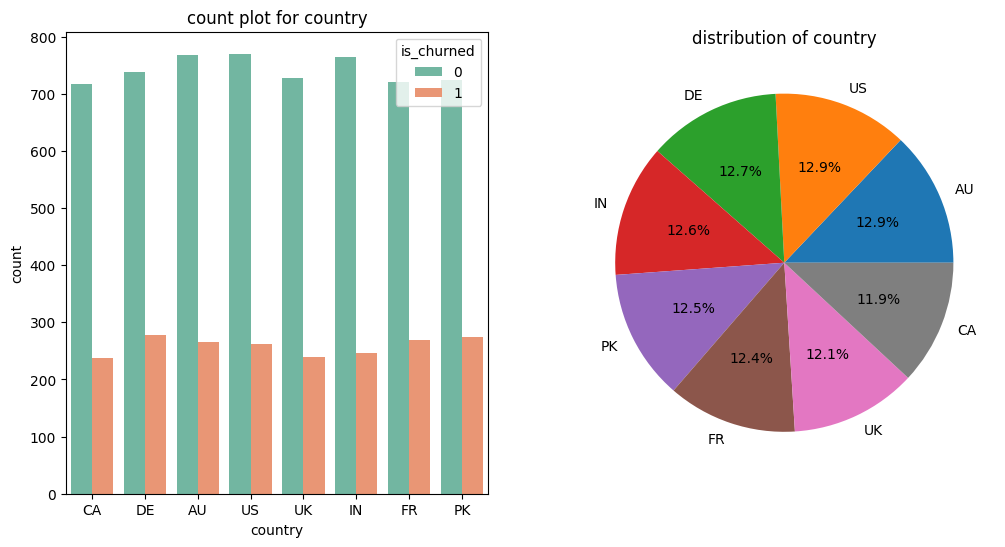

churn data distribution for  gender 
gender  is_churned
Female  0             1960
        1              699
Male    0             2013
        1              678
Other   0             1956
        1              694
Name: count, dtype: int64


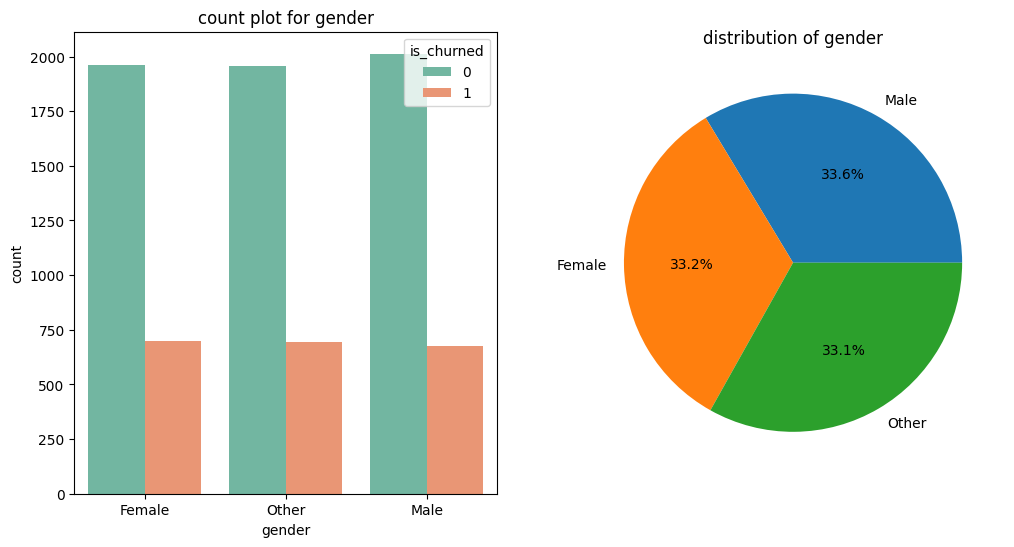

In [8]:
# count plot for categorical columns
for col in cat_col:
    # lets understand the churn disyribution
    print(f"churn data distribution for  {col} ")
    print(df.groupby(col)["is_churned"].value_counts())

    # visulization
    fig,ax = plt.subplots(1,2,figsize = (12,6))
    sns.countplot(x=col,data = df , palette = "Set2",hue = "is_churned", ax = ax[0])
    ax[0].set_title(f"count plot for {col}")

    ax[1].pie(df[col].value_counts(),labels = df[col].value_counts().index,autopct= "%0.01f%%")
    ax[1].set_title(f"distribution of {col}")
    plt.show()
    

In [9]:
# here again we can observe that datadistribution is unbalanced as for churn 0 the bar are higher

churn data distribution for  ads_listened_per_week 
ads_listened_per_week
0     5982
47      58
44      57
16      55
35      53
39      53
41      53
46      51
45      50
26      49
13      49
18      49
36      48
20      47
32      47
38      47
12      46
30      46
31      45
40      45
15      45
43      45
9       44
37      44
34      44
25      44
22      43
11      43
42      43
28      43
27      43
8       43
17      43
5       42
24      42
10      42
14      42
19      42
33      40
6       38
49      38
29      38
7       37
48      36
21      34
23      32
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


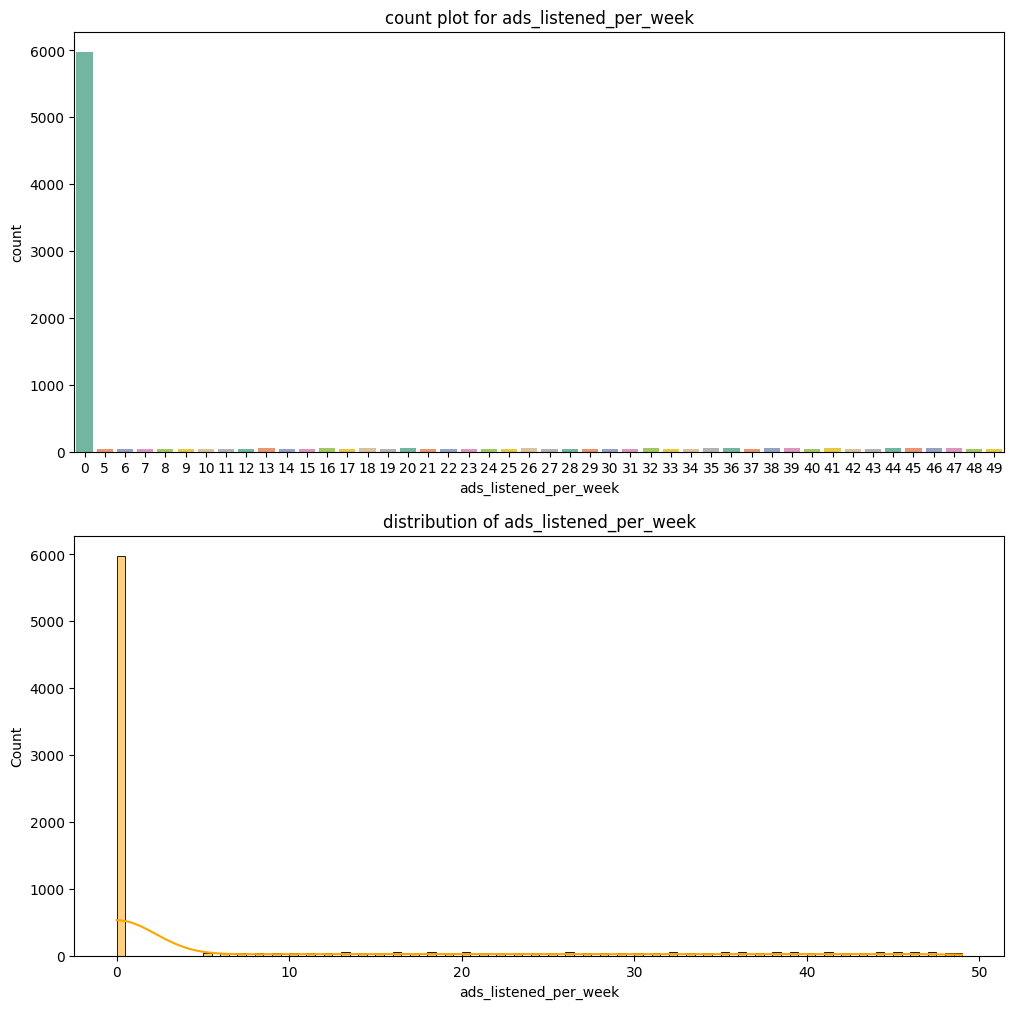

churn data distribution for  age 
age
51    207
37    202
57    202
20    202
49    200
22    200
21    199
42    199
41    196
30    192
46    192
47    190
52    190
48    188
33    186
18    185
53    185
59    184
32    184
50    184
58    183
34    182
19    181
35    179
36    177
17    177
44    176
24    176
23    175
55    174
54    173
39    173
43    173
31    173
28    173
26    173
16    172
38    170
40    170
56    170
25    168
45    168
29    151
27    146
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


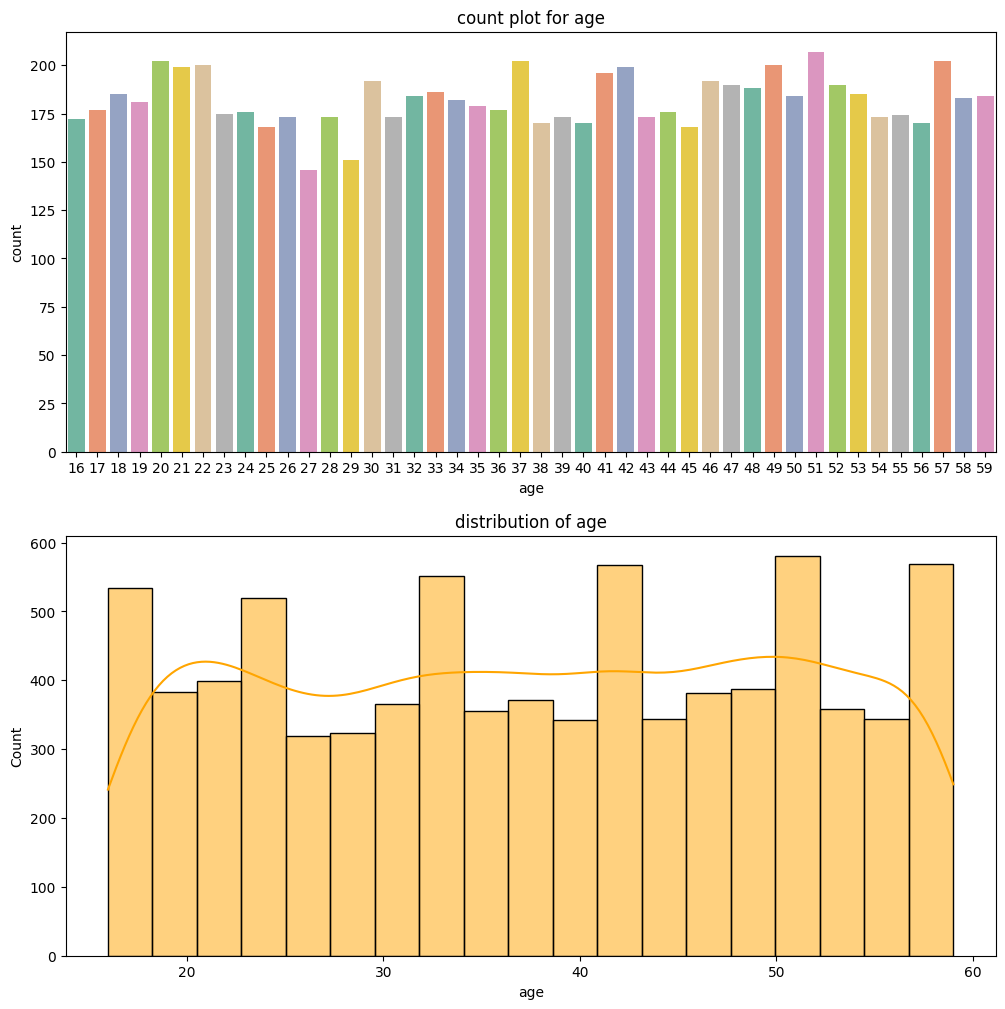

In [10]:
# DISTRUBTION FOR NUM_CAT
for col in cat_num:
    # lets understand the churn disyribution
    print(f"churn data distribution for  {col} ")
    print(df[col].value_counts())

    # visulization
    fig,ax = plt.subplots(2,1,figsize = (12,12))
    sns.countplot(x=col,data = df , palette = "Set2", ax = ax[0])
    ax[0].set_title(f"count plot for {col}")

    sns.histplot(x = col,data =df,color = "orange",edgecolor = "black",kde = True)
    ax[1].set_title(f"distribution of {col}")
    plt.show()
    


churn data distribution for  user_id 
user_id
7961    1
7962    1
7963    1
7964    1
7965    1
       ..
4       1
5       1
6       1
7       1
8       1
Name: count, Length: 8000, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


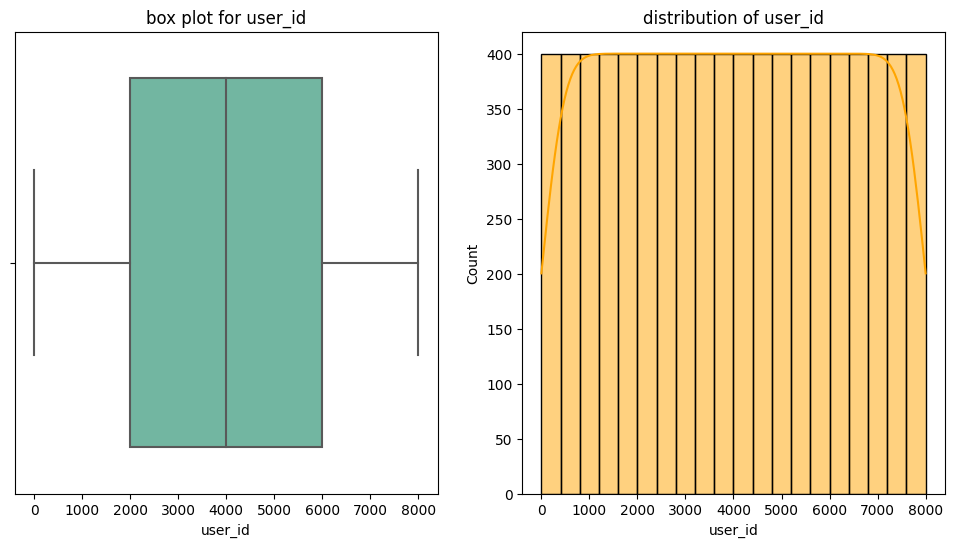

churn data distribution for  listening_time 
listening_time
99     43
113    39
180    39
204    39
251    38
       ..
258    17
69     17
35     17
186    16
121    14
Name: count, Length: 290, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


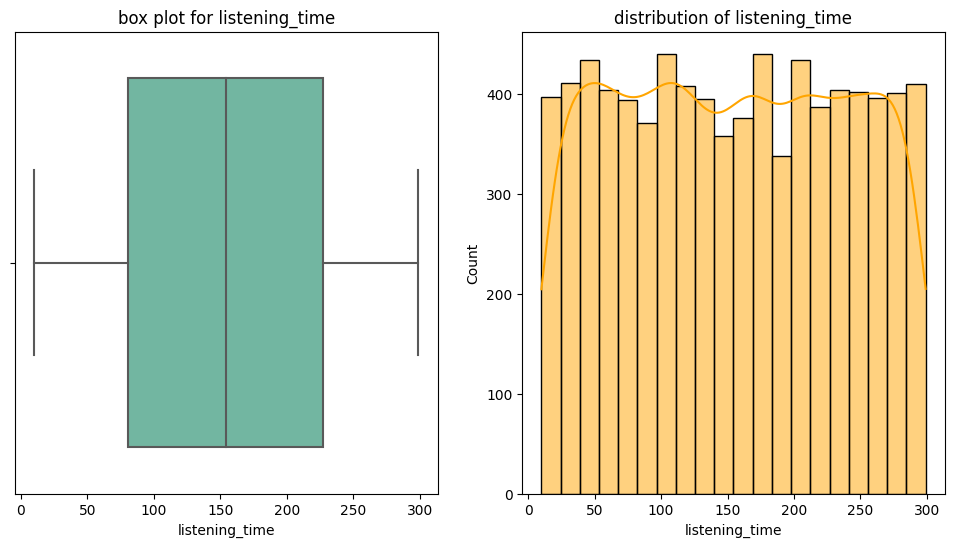

churn data distribution for  songs_played_per_day 
songs_played_per_day
39    102
85    100
60    100
13     96
71     96
     ... 
2      68
10     68
69     67
94     64
89     55
Name: count, Length: 99, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


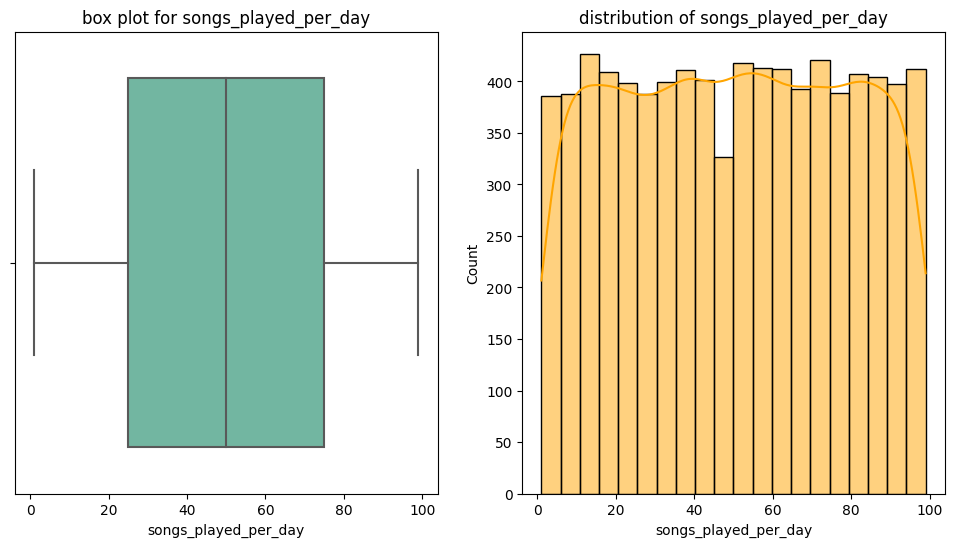

churn data distribution for  skip_rate 
skip_rate
0.34    155
0.15    153
0.56    151
0.19    151
0.10    150
       ... 
0.02    115
0.23    114
0.18    113
0.60     72
0.00     67
Name: count, Length: 61, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


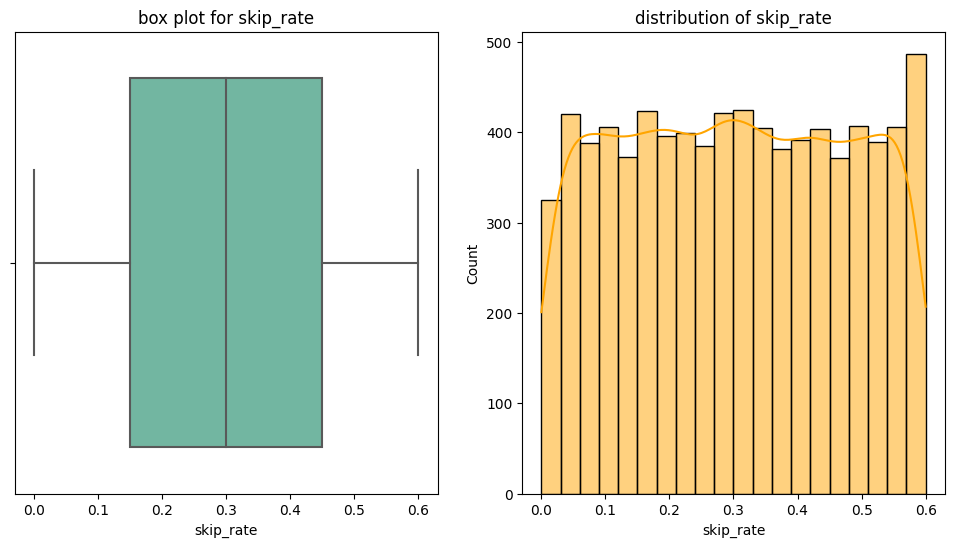

In [11]:
for col in num:
    # lets understand the churn disyribution
    print(f"churn data distribution for  {col} ")
    print(df[col].value_counts())

    # visulization
    fig,ax = plt.subplots(1,2,figsize = (12,6))
    sns.boxplot(x=col,data = df , palette = "Set2", ax = ax[0])
    ax[0].set_title(f"box plot for {col}")

    sns.histplot(x = col,data =df,color = "orange",edgecolor = "black",kde = True)
    ax[1].set_title(f"distribution of {col}")
    plt.show()

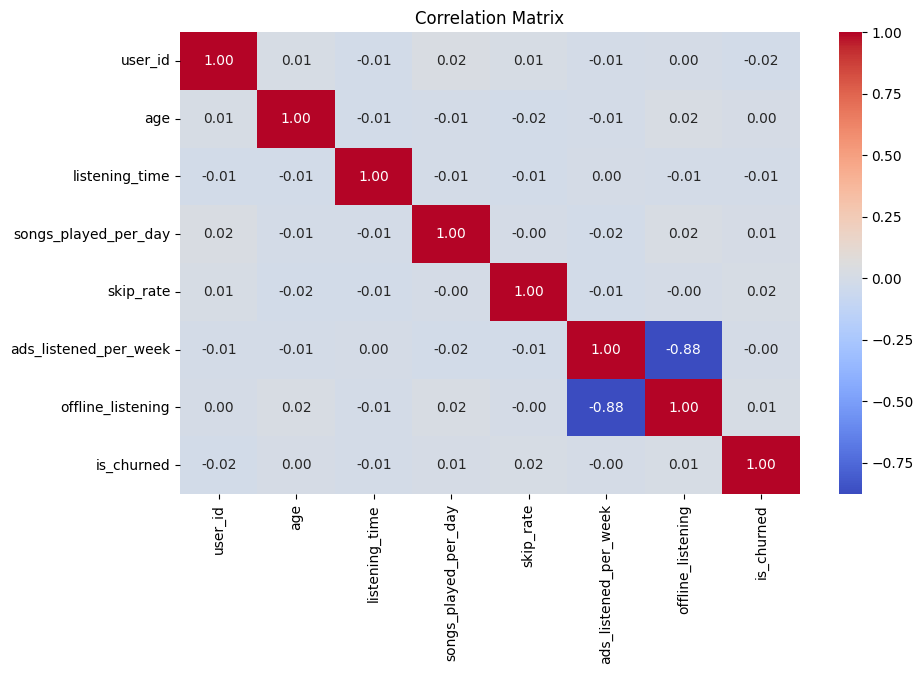

skip_rate                0.016121
offline_listening        0.012754
songs_played_per_day     0.009314
age                      0.003982
ads_listened_per_week   -0.002279
listening_time          -0.007624
user_id                 -0.015994
Name: is_churned, dtype: float64


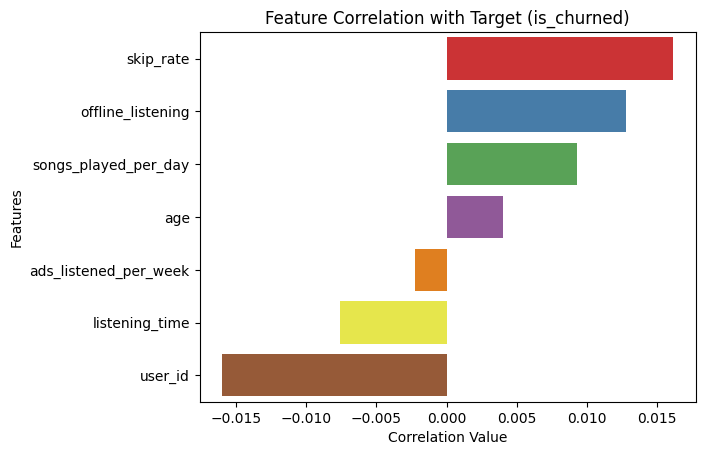

In [12]:
# CORELATION MATRIX 
corr = df.select_dtypes(include = [np.number]).corr()


plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

imp_fea = corr["is_churned"].sort_values(ascending = False)[1:]
print(imp_fea)
sns.barplot(x=imp_fea.values, y=imp_fea.index, palette="Set1")
plt.title("Feature Correlation with Target (is_churned)")
plt.xlabel("Correlation Value")
plt.ylabel("Features")
plt.show()

## FEATURE ENG

In [13]:
# lets do onehot encoding for categorical values 
cat_col = ["offline_listening","device_type","subscription_type","country","gender"]
df = pd.get_dummies(df,columns =cat_col,drop_first = True,dtype = int )

## MODELLING

In [14]:
#train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(df.drop(columns =  ["is_churned"]),df["is_churned"],test_size = 0.2,random_state = 1)


In [15]:
# lets scale inputts
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrainscale = ss.fit_transform(xtrain)
xtestscale = ss.transform(xtest)

In [16]:
# import models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
logr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
boost =GradientBoostingClassifier()
adboost = AdaBoostClassifier()
bag = BaggingClassifier()
models = [logr,knn,tree,svc,forest,boost,adboost,bag]

In [17]:
# MODELS WITHOUT TUNNING

In [18]:
from sklearn.metrics import accuracy_score
for model in models:
    model.fit(xtrainscale,ytrain)
    print(f"{model } is succefully trained")
    print(f"accuracy score for {model } is {accuracy_score(ytest,model.predict(xtestscale))}")
    print("\n"+"="*100+"\n")

LogisticRegression() is succefully trained
accuracy score for LogisticRegression() is 0.74875


KNeighborsClassifier() is succefully trained
accuracy score for KNeighborsClassifier() is 0.695


DecisionTreeClassifier() is succefully trained
accuracy score for DecisionTreeClassifier() is 0.5975


SVC() is succefully trained
accuracy score for SVC() is 0.74875


RandomForestClassifier() is succefully trained
accuracy score for RandomForestClassifier() is 0.745625


GradientBoostingClassifier() is succefully trained
accuracy score for GradientBoostingClassifier() is 0.748125


AdaBoostClassifier() is succefully trained
accuracy score for AdaBoostClassifier() is 0.74875


BaggingClassifier() is succefully trained
accuracy score for BaggingClassifier() is 0.7175




In [19]:
from sklearn.model_selection import GridSearchCV

# Define models & their parameter grids
param_grid = {
    "LogisticRegression": (
        LogisticRegression(max_iter=1000),
        {"C": [0.01, 0.1, 1, 10], "solver": ["liblinear", "lbfgs"]}
    ),
    "KNeighborsClassifier": (
        KNeighborsClassifier(),
        {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]}
    ),
    "DecisionTreeClassifier": (
        DecisionTreeClassifier(),
        {"max_depth": [3, 5, 7, None], "criterion": ["gini", "entropy"]}
    ),
    "SVC": (
        SVC(),
        {"C": [0.1, 1, 10], "kernel": ["linear", "rbf", "poly"], "gamma": ["scale", "auto"]}
    ),
    "RandomForestClassifier": (
        RandomForestClassifier(),
        {"n_estimators": [50, 100, 200],
         "max_depth": [None, 5, 10],
         "min_samples_split": [2, 5]}
    ),
    "GradientBoostingClassifier": (
        GradientBoostingClassifier(),
        {"n_estimators": [50, 100, 200],
         "learning_rate": [0.01, 0.1, 0.2],
         "max_depth": [3, 5, 7]}
    ),
    "AdaBoostClassifier": (
        AdaBoostClassifier(),
        {"n_estimators": [50, 100, 200],
         "learning_rate": [0.01, 0.1, 1]}
    ),
    "BaggingClassifier": (
        BaggingClassifier(),
        {"n_estimators": [10, 50, 100],
         "max_samples": [0.5, 0.7, 1.0],
         "max_features": [0.5, 0.7, 1.0]}
    )
}

results = []

# Run grid search for each model
for name, (model, params) in param_grid.items():
    print(f"🔍 Tuning {name} ...")
    grid = GridSearchCV(model, params, cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(xtrainscale, ytrain)
    
    best_model = grid.best_estimator_
    best_score = grid.best_score_
    test_score = best_model.score(xtestscale, ytest)
    
    print(f"{name}: Best Params = {grid.best_params_}")
    print(f"CV Score = {best_score:.4f}, Test Score = {test_score:.4f}")
    print("="*70)
    
    results.append((name, grid.best_params_, best_score, test_score))


🔍 Tuning LogisticRegression ...
LogisticRegression: Best Params = {'C': 0.01, 'solver': 'liblinear'}
CV Score = 0.7392, Test Score = 0.7488
🔍 Tuning KNeighborsClassifier ...
KNeighborsClassifier: Best Params = {'n_neighbors': 9, 'weights': 'uniform'}
CV Score = 0.7148, Test Score = 0.7175
🔍 Tuning DecisionTreeClassifier ...
DecisionTreeClassifier: Best Params = {'criterion': 'entropy', 'max_depth': 3}
CV Score = 0.7386, Test Score = 0.7488
🔍 Tuning SVC ...
SVC: Best Params = {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
CV Score = 0.7392, Test Score = 0.7488
🔍 Tuning RandomForestClassifier ...
RandomForestClassifier: Best Params = {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
CV Score = 0.7394, Test Score = 0.7488
🔍 Tuning GradientBoostingClassifier ...
GradientBoostingClassifier: Best Params = {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
CV Score = 0.7394, Test Score = 0.7481
🔍 Tuning AdaBoostClassifier ...
AdaBoostClassifier: Best Params = {'learning

## 📊 Model Training & Tuning Observations

### ✅ Base Model Performances
- **LogisticRegression()** → Accuracy: **0.7488**
- **KNeighborsClassifier()** → Accuracy: **0.6950**
- **DecisionTreeClassifier()** → Accuracy: **0.5888**
- **SVC()** → Accuracy: **0.7488**
- **RandomForestClassifier()** → Accuracy: **0.7481**
- **GradientBoostingClassifier()** → Accuracy: **0.7488**
- **AdaBoostClassifier()** → Accuracy: **0.7488**
- **BaggingClassifier()** → Accuracy: **0.7250**

📌 *Observation*: Most ensemble models and linear models (Logistic Regression, SVC, Random Forest, Gradient Boosting, AdaBoost) achieve similar accuracy (~0.748).  
DecisionTree performs poorly (**0.5888**), while KNN also underperforms (**0.6950**).

---

### 🔍 After Hyperparameter Tuning
- **LogisticRegression** → Best Params: `{'C': 0.01, 'solver': 'liblinear'}` → CV: **0.7392**, Test: **0.7488**
- **KNeighborsClassifier** → Best Params: `{'n_neighbors': 9, 'weights': 'uniform'}` → CV: **0.7148**, Test: **0.7175**
- **DecisionTreeClassifier** → Best Params: `{'criterion': 'entropy', 'max_depth': 3}` → CV: **0.7386**, Test: **0.7488**
- **SVC** → Best Params: `{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}` → CV: **0.7392**, Test: **0.7488**
- **RandomForestClassifier** → Best Params: `{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}` → CV: **0.7392**, Test: **0.7488**
- **GradientBoostingClassifier** → Best Params: `{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}` → CV: **0.7394**, Test: **0.7481**
- **AdaBoostClassifier** → Best Params: `{'learning_rate': 0.01, 'n_estimators': 50}` → CV: **0.7392**, Test: **0.7488**
- **BaggingClassifier** → Best Params: `{'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 100}` → CV: **0.7391**, Test: **0.7488**

📌 *Observation*:  
- After tuning, **most classifiers converge around ~0.739 CV score and ~0.748 Test score**.  
- **DecisionTree improves significantly** after tuning (from **0.5888 → 0.7488**).  
- **KNN still lags** behind despite tuning (**0.7175 test score**).  
- Ensemble models (Random Forest, Gradient Boosting, AdaBoost, Bagging) show **similar performance to Logistic Regression and SVC**, meaning the dataset may not require very complex models.  

---

### 📝 Key Insights
- The dataset seems **well-suited for linear models** (Logistic Regression, SVC) and shallow ensemble models.  
- **Simple models perform as well as ensembles**, indicating limited non-linear relationships.  
- **Overfitting is not severe**, as CV and Test scores are closely aligned.  
- **DecisionTree alone is weak**, but ensembles mitigate its limitations.  
- Further gains may require **feature engineering, data augmentation, or external data** rather than just tuning models.  


## DEEP LEARNING

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2025-09-19 10:51:05.957006: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758279066.171832      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758279066.228900      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [21]:
# SIMPLE ANN WITHOUT TUNNING
dim = xtrain.shape[1]
model1 = Sequential()

model1.add(Dense(128,input_dim=dim, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))
model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1758279078.986540      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758279078.987245      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,457 (76.00 KB)

 Trainable params: 19,457 (76.00 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model1.compile(loss='binary_crossentropy' , metrics=['accuracy'])
history = model1.fit(xtrainscale, ytrain, epochs=10,batch_size = 1, validation_split = 0.2) #stocastic gradient decent

Epoch 1/10


I0000 00:00:1758279081.282764      88 service.cc:148] XLA service 0x79c1ac006940 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758279081.283537      88 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758279081.283558      88 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1758279081.488969      88 cuda_dnn.cc:529] Loaded cuDNN version 90300


  78/5120 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.6800 - loss: 0.6513 

I0000 00:00:1758279081.821561      88 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5120/5120 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.7309 - loss: 0.6243 - val_accuracy: 0.7523 - val_loss: 0.5903
Epoch 2/10
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7228 - loss: 0.6177 - val_accuracy: 0.7531 - val_loss: 0.7317
Epoch 3/10
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.7275 - loss: 0.6315 - val_accuracy: 0.7531 - val_loss: 0.5931
Epoch 4/10
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7279 - loss: 0.6246 - val_accuracy: 0.7531 - val_loss: 0.6567
Epoch 5/10
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7322 - loss: 0.6291 - val_accuracy: 0.7531 - val_loss: 0.6692
Epoch 6/10
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7302 - loss: 0.6296 - val_accuracy: 0.7531 - val_loss: 0.6263
Epoch 7/10
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7191 - loss: 0.6395 - val_accuracy: 0.7531 - val_loss: 0.6199
Epoch 8/10
5120/5120 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.7391 - loss: 0.6266 - val

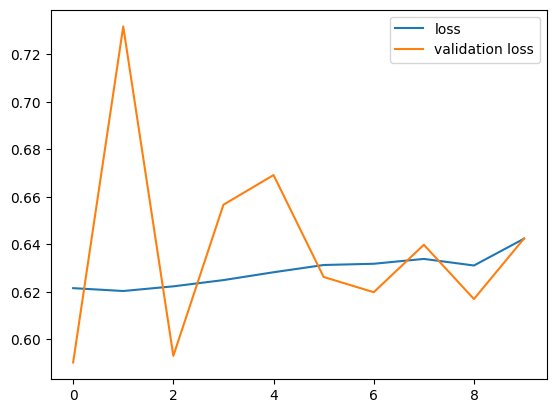

In [23]:
plt.plot(history.history['loss'],label = "loss")
plt.plot(history.history['val_loss'],label = "validation loss")
plt.legend()
plt.show()


### 📊 Observations from the Loss Curve

- **Overfitting is not severe yet**  
  - Validation loss is not consistently rising  
  - But it’s unstable → indicates learning issues  

- **Possible reasons for instability**  
  - Dataset is small or noisy  
  - Model complexity might not match the data  
  - Batch size is too large (`5000` reduces updates per epoch)  

- **Accuracy may not improve much**  
  - Loss is hovering around `0.66–0.68`  
  - Random guess for binary classification gives ~`0.69` log-loss  


### 🔹 What you can try next

- **Reduce batch size**  
  - Example: `batch_size=32` or `64`  
  - Allows more updates per epoch → smoother learning  

- **Increase epochs**  
  - Train for `50–100` epochs  
  - Current loss is still not fully converging  

- **Add dropout or regularization**  
  - Helps if overfitting starts appearing  

- **Check data preprocessing**  
  - Ensure features are scaled  
  - Confirm `y` is properly encoded as `0/1`  

- **Try a different optimizer**  
  - Use `adam` or `rmsprop` instead of default `SGD`  

## THANKS ,IF YOU LIKE MY WORK PLEASE UPVOTE